# 0.1 Poisson Processes

### 0.1a

$$
P(arrival) = p\Delta t\\
P(no-arrival) = 1 - p\Delta t
$$

### 0.1b

$$
P(n| t + \Delta t, t_0) = P(arrival)P(n-1| t, t_0) + P(no-arrival)P(n| t, t_0)\\
P(n| t + \Delta t, t_0) = p\Delta t\times P(n-1| t, t_0) + (1-p\Delta t)\times P(n| t, t_0)
$$

### 0.1c

$$
\frac{dP(n| t, t_0)}{dt} = \frac{P(n| t + \Delta t, t_0) - P(n| t, t_0)}{\Delta t}\\
= \frac{p\Delta t* P(n-1| t, t_0) + (1-p\Delta t)\times P(n| t, t_0) - P(n| t, t_0)}{\Delta t}\\
= pP(n-1| t, t_0) -pP(n| t, t_0)
$$

### 0.1d

$$
P(0| t, t_0) = P(no-arrival)P(0| t, t_0)\\
P(0| t, t_0) = (1-p\Delta t)P(0| t, t_0)\\
\frac{dP(0| t, t_0)}{dt} = \frac{P(0| t + \Delta t, t_0) - P(0| t, t_0)}{\Delta t}\\
= \frac{(1-p\Delta t)\times P(0| t, t_0) - P(0| t, t_0)}{\Delta t}\\
= -pP(0| t, t_0)
$$

### 0.1e

The $A_n(t)$ terms should be normalised for $P(n|t,t_0)$ to represent a probability distribution. Imposing the normalisation condition we derive the $A_n(t)$ values.

$$
\sum_n P(n|t,t_0) = \sum_n A_n(t)e^{-p(t-t_0)} = 1\\
\sum_n A_n(t) =  e^{p(t-t_0)} = \sum_n \frac{(p(t-t_0))^n}{n!}\\
A_n(t) = \frac{(p(t-t_0))^n}{n!}\\
P(n|t,t_0) = \frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)}
$$

Now whats left is to prove that this ansatz satisfies the differential equations.

$$
\frac{dP(n|t,t_0)}{dt} = n\frac{p^n(t-t_0)^{n-1}}{n!}e^{-p(t-t_0)} -p\frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)}\\
= p\frac{(p(t-t_0))^{n-1}}{(n-1)!}e^{-p(t-t_0)} -p\frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)}\\
= pP(n-1|t,t_0) - pP(n|t,t_0)
$$

Quod erat demonstrandum

### 0.1f

This distribution is a Poisson distribution, defined as

$$
P = \frac{\lambda^ne^{-\lambda}}{n!}
$$

Where $\lambda$ is the expectation value. Now our equation is already in this form, with $\lambda = p(t-t_0)$.

### 0.1g

To find the maximum amount of people likely to come to the party, we impose the boundaries

$$
P(n|t,t_0) > P(n-1|t,t_0)\\
A_n(t) > A_{n-1}(t)\\
\frac{(p(t-t_0))^n}{n!} > \frac{(p(t-t_0))^{n-1}}{(n-1)!}\\
\frac{p(t-t_0)}{n} > 1
$$
And the other boundary:
$$
P(n|t,t_0) > P(n+1|t,t_0)\\
A_n(t) > A_{n+1}(t)\\
\frac{(p(t-t_0))^n}{n!} > \frac{(p(t-t_0))^{n+1}}{(n+1)!}\\
1 > \frac{p(t-t_0)}{n-1}
$$
So that we get
$$
p(t - t_0) - 1 < n < p(t-t_0)
$$

This interval contains exactly one integer value, representing the amount of people maximaly likely to arrive

### 0.1h

/Users/lena/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


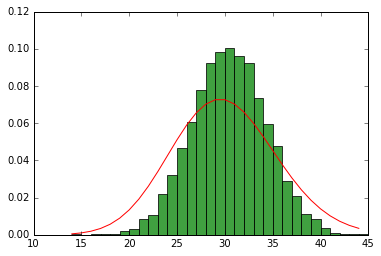

In [5]:
import random
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import poisson

%matplotlib inline

def visitors_in_hour(p):
    visitors = 0
    for t in range(60):
        if p >= random.random():
            visitors += 1
    return visitors

fig = plt.figure()
p=0.5
experiment_list = []
for i in range(10000):
    experiment_list.append(visitors_in_hour(p))
bin_count = max(experiment_list) - min(experiment_list)
n, bins, patches = plt.hist(experiment_list, bin_count, normed=True, facecolor='green', alpha=0.75)


mu = p*(60)
dist = poisson(mu)
x = range(min(experiment_list), max(experiment_list))
poi = [dist.pmf(i) for i in x]
plt.plot(x, poi, c='red')
fig.show()

### 0.1i

/Users/lena/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


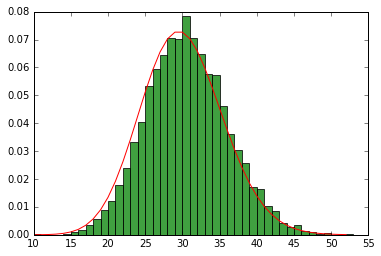

In [6]:
def visitors_in_hour_per_second(p):
    visitors = 0
    for t in range(60*60):
        if p >= random.random():
            visitors += 1
    return visitors

fig = plt.figure()
experiment_list = []
p=0.5/60
for i in range(10000):
    experiment_list.append(visitors_in_hour_per_second(p))
bin_count = max(experiment_list) - min(experiment_list)
n, bins, patches = plt.hist(experiment_list, bin_count, normed=True, facecolor='green', alpha=0.75)

mu = p*(60*60-0)
dist = poisson(mu)
x = range(min(experiment_list), max(experiment_list))
poi = [dist.pmf(i) for i in x]
plt.plot(x, poi, c='red')
fig.show()

Q: Why are the two simulated distributions not the same? Which one is more accurate? And why?
A: The second is more accurate. This is caused byt the fact that we generate more random values, such that every value becomes less important (has less impact) but rahter the mass of it.

### 0.1j

$$ dtP(t|n,t_0)=  dtP(n|t,t_0) pdt=dt \frac{p(pt-t_0)^{n-1}e^{-p(t-t_0)}}{(n-1)!} $$

## 0.1k
$$P(t;1, t_0) = pe^{-p(t-t_0)}$$
The general form of an exponential distribution is:
$$f(x)=\lambda e^{-\lambda x}$$
So using pattern matching with the given distribution, we find:
$$p=\lambda$$
As the mean of the genral form of an exponential distribution is:
$$\lambda^{-1}$$ the mean of this distribution is $$p^{-1}$$


## 0.1l

$$
\int_{t_0}^{t_2}P(t_1;1,t_0)P(t_2;2,t_1)dt_1
=\int_{t_0}^{t_2}\frac{p(p(t_1-t_0))^{1-1}e^{-p(t_1-t_0)}}{(1-1)!}\times\frac{p(p(t_2-t_1))^{2-1}e^{-p(t_2-t_1)}}{(2-1)!}dt_1\\
=\int_{t_0}^{t_2}\frac{p(p(t_1-t_0))^{0}e^{-p(t_1-t_0)}}{(0)!}\times\frac{p(p(t_2-t_1))^{1}e^{-p(t_2-t_1)}}{(1)!}dt_1\\
=\int_{t_0}^{t_2}pe^{-p(t_1-t_0)}\times p(p(t_2-t_1))e^{-p(t_2-t_1)}dt_1\\
=\int_{t_0}^{t_2}p(p(t_2-t_1))e^{-p(t_1-t_0 + t_2-t_1)}dt_1\\
=\int_{t_0}^{t_2}p(p(t_2-t_1))e^{-p(t_2-t_0)}dt_1\\
=pe^{-p(t_2-t_0)}\int_{t_0}^{t_2}p(t_2-t_1)dt_1\\
=pe^{-p(t_2-t_0)}[\frac{(p(t_2-t_1))^2}{2}]_{t_0}^{t_2}\\
=pe^{-p(t_2-t_0)}[\frac{(p(t_2-t_2))^2}{2}-\frac{(p(t_2-t_0))^2}{2}]\\
=-\frac{p(p(t_2-t_0))^2e^{-p(t_2-t_0)}}{2}\\
=-P(t_2;2,t_0)
$$

## 0.1 m


Times generated: 309448


/Users/lena/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


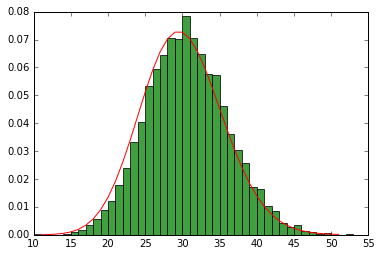

In [7]:
import numpy as np
times = []
def exponential_pdf_visitors_one_hour(p):
    visitors = 0
    time = 0
    while time < 60:
        t = np.random.exponential(1/p)
        time += t
        times.append(t)
        visitors += 1
    return visitors-1
        
        
fig = plt.figure()
p=0.5
visitors_list = []
for i in range(10000):
    visitors = exponential_pdf_visitors_one_hour(p)
    visitors_list.append(visitors)
n, bins, patches = plt.hist(experiment_list, bin_count, normed=True, facecolor='green', alpha=0.75)

print("Times generated:",len(times))


mu = p*(60-0)
dist = poisson(mu)
x = range(min(visitors_list), max(visitors_list))
poi = [dist.pmf(i) for i in x]
plt.plot(x, poi, c='red')
fig.show()

## 0.1n
Times generated: 309685

Number of steps in i): 600000

Therefore the number of times generated is roughly 600000/2

 ### 0.1o
 
$$
\int_{t_0}^{t}P(n;t_n,t_0)P(t;0,t_n)dt_n
=\int_{t_0}^{t}\frac{p(p(t_n-t_0))^{n-1}e^{-p(t_n-t_0)}}{(n-1)!}\times pe^{-p(t-t_n)}dt_n\\
=\int_{t_0}^{t}\frac{p(p(t_n-t_0))^{n-1}pe^{-p(t_n-t_0+t-t_n)}}{(n-1)!}dt_n\\
=\int_{t_0}^{t}\frac{p(p(t_n-t_0))^{n-1}pe^{-p(t-t_0)}}{(n-1)!}dt_n\\
=\frac{pp^{n-1}pe^{-p(t-t_0)}}{(n-1)!}\int_{t_0}^{t}(t_n-t_0)^{n-1}dt_n\\
=\frac{pp^{n}e^{-p(t-t_0)}}{(n-1)!}[\frac{(t_n-t_0)^{n}}{n}]_{t_0}^{t}\\
=\frac{pp^{n}e^{-p(t-t_0)}}{(n-1)!}\frac{(t-t_0)^{n}}{n}\\
=\frac{p(p(t-t_0))^{n}e^{-p(t-t_0)}}{n!}\\
=P(n;t,t_0)
$$

## 0.2)

### 0.2a


Since for the expression of $P(n|t+\Delta t, t_0)$ we used p(t) and not $p(t + \Delta t)$, the differential equations remain the same. Since the time dependence of the equation changed we have to formulate a new anzats to match our differential equation $\frac{dP(n|t,t_0)}{dt} = -p(t)P(n|t,t_0) + p(t)P(n-1|t,t_0)$. As an anzats we take the general form of the Poisson distribution solution with a time dependent $\lambda(t)$.\\

$$
P(n|t,t_0) = \frac{\lambda(t)^ne^{-\lambda(t)}}{n!}\\
\frac{dP(n|t,t_0)}{dt} = \frac{d\lambda}{dt} (\frac{n\lambda(t)^{n-1}e^{-\lambda(t)}}{n!} - \frac{\lambda(t)^ne^{-\lambda(t)}}{n!})\\
= \frac{d\lambda}{dt} \frac{\lambda(t)^{n-1}e^{-\lambda(t)}}{(n-1)!} - \frac{d\lambda}{dt}\frac{\lambda(t)^ne^{-\lambda(t)}}{n!})\\
= -\frac{d\lambda}{dt}P(n|t,t_0) + \frac{d\lambda}{dt}P(n-1|t,t_0))\\
= -pP(n|t,t_0) + pP(n-1|t,t_0)\\
\frac{d\lambda}{dt} = p(t)\\
\lambda = \int_{t_0}^tp(t)dt
$$

Now if we keep p constant over time we get $\lambda = \int_{t_0}^tp(t)dt = p(t - t_0)$, which was our original result for constant p!

### 0.2b

$$
P(0|\infty,t_0) = \frac{\lambda(\infty)^0e^{-\lambda(\infty)}}{0!}\\
= e^{-\lambda(\infty)}\\
\lambda(\infty) = \int_{t_0}^{\infty}p(t)dt
$$

This chance goes to 0 for $\lambda \rightarrow \infty$. If we would take p(t) = constant, then $\lambda = \infty$ and $P(0|\infty,t_0) = 0$, but if we take a p(t) that will give us a non-infinitely large $\lambda$ value ($p(t) = 1$, for $0 < t < 1$, $p(t) = 0$ otherwise, for example) our $P(0|\infty,t_0) \neq 0$. 

## 0.2c
$$
P(t|n,t_0) = p(t)P(n-1|t,t_0)\\
= p(t)\frac{\lambda(t)^{n-1}e^{-\lambda(t)}}{(n-1)!}
$$

## 0.2d
$$
P(t_2|2,t_0) = \int_{t_0}^{t_2} P(t_1|1,t_0)P(t_2|2,t_1)dt_1 \\
= \int_{t_0}^{t_2} p(t_1)e^{-\int_{t_0}^{t_1} p(s)ds}p(t_2)e^{-\int_{t_1}^{t_2} p(s)ds}dt_1\\
= p(t_2)\int_{t_0}^{t_1} p(t_1)e^{-(\int_{t_0}^{t_2} p(s)ds+\int_{t_1}^{t_2} p(s)ds)}dt_1\\
= p(t_2)e^{-\int_{t_0}^{t_2} p(s)ds}\int_{t_0}^{t_2} p(t_1)dt_1\\
= p(t_2)\lambda(t_2)e^{-\lambda(t_2)}\\
= p(t_2)\frac{\lambda(t_2)^{n-1}e^{-\lambda(t_2)}}{(n-1)!}, \text{for }n = 2
$$

## 0.2e

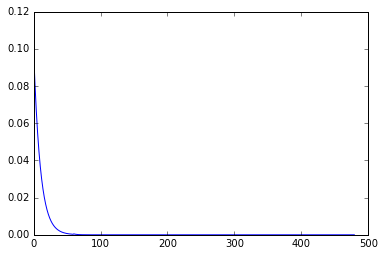

In [12]:
import math

pt = {18:0.1,
      19:0.2,
      20:0.3,
      21:0.4,
      22:0.5,
      23:0.6,
      0:0.3,
      1:0.1}

def nth_visitor_arrival(n, t0, t):
    l = lambda_function(t0, t)
    hour = get_hour(t)
    return (pt[hour] * math.pow(l,n-1) * math.exp(-l))/math.factorial(n-1)

def get_hour(minute):
    return (18+math.floor(minute/60))%24

def get_rate(minute):
    return pt[get_hour(minute)]

def lambda_function(t0, t):
    result = 0
    for minute in range(t0, t):
        hour = get_hour(minute)
        rate = pt[hour]
        result += rate
    return result


results = []
for minute in range(60*len(pt)):
    result =nth_visitor_arrival(1, 0, minute)
    results.append(result)

plt.plot(results)


plt.show()

## 0.2f

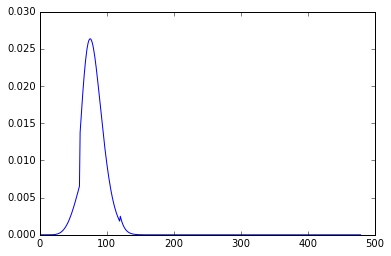

In [13]:
results = []
for minute in range(60*len(pt)):
    result =nth_visitor_arrival(10, 0, minute)
    results.append(result)

plt.plot(results)

plt.show()

## 0.2 g

In [14]:
def random_number(t0, nth_visitor):
    # use distribution given by the formula and integrate
    r = random.random()
    integral = 0
    for minute in range(1,60*len(pt)):
        integral += nth_visitor_arrival(nth_visitor, t0, minute)
        if integral>=r:
            return minute

In [15]:
def random_number2(t0):
    # Use the rewritten formula to get the time at which the nth person comes in
    r = random.random()
    t = -1/get_rate(t0) * math.log(1-r)
    t =  t if t> 0 else 0
    return t

print(random_number2(300))

0.7810601151442712


In [16]:
def random_number3(t0):
    # look per minute whether someone comes in or not
    r = random.random()
    for minute in range(t0,60*len(pt)):
        if get_rate(minute) >= random.random():
            return minute

## 0.2 h

100


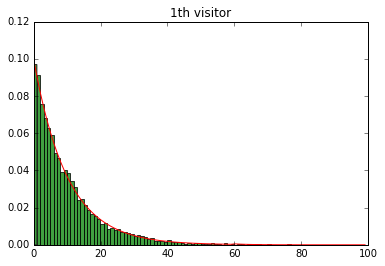

201


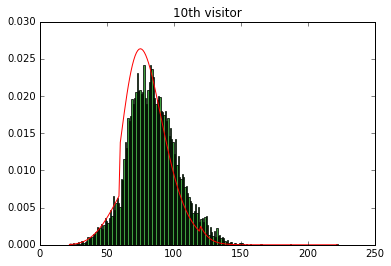

177


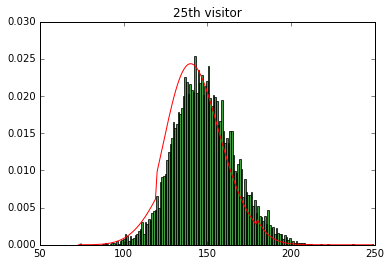

In [30]:
first_visitors = []
tenth_visitors = []
v25 = []

for i in range(10000):
    minute = 0
    nth_visitor=1
    arrival_times = []
    c = 0
    while minute != None and minute < (60*len(pt)) and c < 200:
        r = random_number2(int(minute))
#         print(r)
        minute += r
        
#         minute = math.ceil(minute)
        c+=1
#         print(minute)
        if minute:
            nth_visitor += 1
            arrival_times.append(minute)
        else:
            break
    try:
        first_visitors.append(arrival_times[0])
        tenth_visitors.append(arrival_times[9])
        v25.append(arrival_times[24])
    except:
        continue

    
def plot_visitors(visitors, v):
    #plot 1
    fig = plt.figure()
    bin_count = math.ceil(max(visitors)) - math.floor(min(visitors))
    print(bin_count)
    n, bins, patches = plt.hist(visitors, bin_count, normed=True, facecolor='green', alpha=0.75)

    first_range = range(math.floor(min(visitors)), math.ceil(max(visitors)))
    real_results = []
    for minute in first_range:
        result = nth_visitor_arrival(v, 0, minute)
        real_results.append(result)

    x = first_range
    plt.plot(x, real_results, c='red')
    plt.title('{}th visitor'.format(v))
    plt.show()

plot_visitors(first_visitors, 1)
plot_visitors(tenth_visitors, 10)
plot_visitors(v25, 25)

## 0.3

### 0.3a

$$
P(t|n+1, t_0) = p(n, t)e^{-\int_{t_0}^tp(n,s)ds}\\
= p(n, t)P(n|t,t_0)\\
P(t|n, t_0) = p(n-1, t)P(n-1|t,t_0)
$$
where
$$
P(n|t,t_0) = e^{-\int_{t_0}^tp(n,s)ds}\\
\sum_{n=0}^{\infty} P(n|t,t_0) = 1
$$

### 0.3b

$$
P(t_2|2,t_0) = \int_{t_0}^{t_2} P(t_1|1,t_0) P(t_2|2,t_1)dt_1\\
= \int_{t_0}^{t_2} p(0, t_1)e^{-\int_{t_0}^{t_1}p(0,s)ds} p(1, t_2)e^{-\int_{t_1}^{t_2}p(1,s)ds} dt_1\\
= p(1, t_2)\int_{t_0}^{t_2} p(0, t_1)e^{-\int_{t_0}^{t_1}p(0,s)ds} e^{-\int_{t_1}^{t_2}p(1,s)ds} dt_1\\
$$

### 0.3c

We now have
$$
e^{-\int_{t_0}^{t_1}p(0,s)ds} e^{-\int_{t_1}^{t_2}p(1,s)ds} = e^{-(\int_{t_0}^{t_1}p(0,s)ds+\int_{t_1}^{t_2}p(1,s)ds)}
$$
which cannot be concatinated because the p-values are now not the same in the two integrals. In other words, before we had $\int_{t_0}^{t_1}a(s)ds+\int_{t_1}^{t_2}a(s)ds = \int_{t_0}^{t_2}a(s)ds$, but now we have $\int_{t_0}^{t_1}a_1(s)ds+\int_{t_1}^{t_2}a_2(s)ds$. 

The consequence of this is that the exponentials remain being dependent on $t_1$, so we cannot take them out of the integral.

| Start | End   | Rate |
|-------|-------|------|
| 18:00 | 19:00 | 0.1  |
| 19:00 | 20:00 | 0.2  |
| 20:00 | 21:00 | 0.3  |
| 21:00 | 22:00 | 0.4  |
| 22:00 | 23:00 | 0.5  |
| 23:00 | 00:00 | 0.6  |
| 00:00 | 01:00 | 0.3  |
| 01:00 | 02:00 | 0.1  |

### 0.3d

	Step  0	Step  1000	Step  2000	Step  3000	Step  4000	Step  5000	Step  6000	Step  7000	Step  8000	Step  9000

P(t| 1 ,t_0) distribution


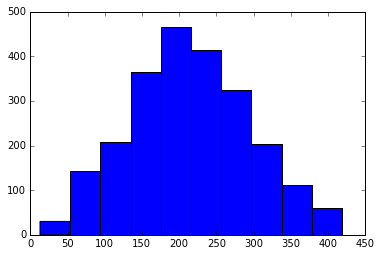



P(t| 2 ,t_0) distribution


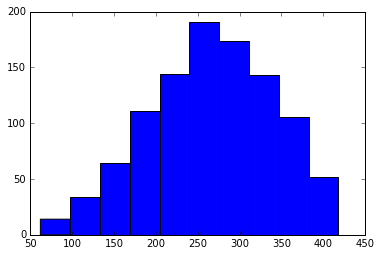



P(t| 3 ,t_0) distribution


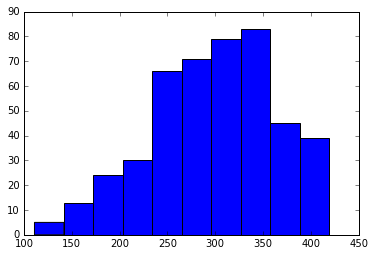



P(t| 4 ,t_0) distribution


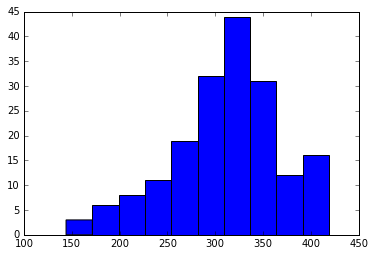



P(t| 5 ,t_0) distribution


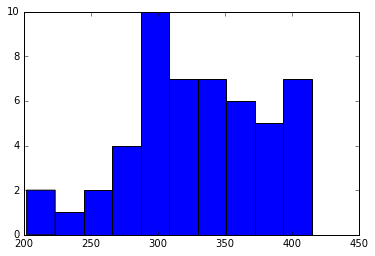



P(t| 6 ,t_0) distribution


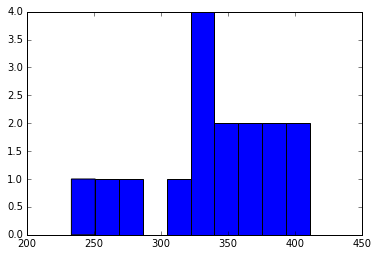



P(t| 7 ,t_0) distribution


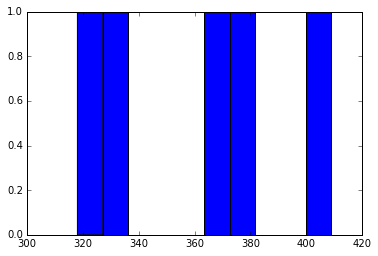



P(t| 8 ,t_0) distribution


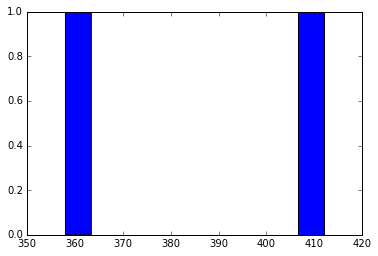



P(t| 9 ,t_0) distribution


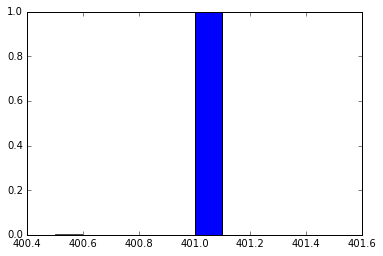

In [9]:
%matplotlib inline

import math, random
import matplotlib.pyplot as plt
import numpy as np

def p(n, tstep):
    # chance of someone comming in
    rates = [.1, .2, .3, .4, .5, .6, .3, .1]
    pt = rates[tstep]/resolution
    q = pt*math.exp(-0.05*(n-100))/(1+math.exp(-0.05*(n-100)))
    return q

def PDFformula(goalValue):
    # The function calculating the PDF values at each point.
    # The PDF values are integrated (sum(PDFs)) to get the
    # integrated chances of finding n people at time t, giving
    # a number between 0 and 1.
    #
    # By comparing to a random uniform distribution, a distribution
    # for the PDF for different numbers of arrived people is 
    # obtained.
    people, PDFs, p_nts = 0, [], []
    steps = int(numTimeSteps*resolution)
    
    for t in range(steps):
        tstep = int(t/resolution)
        p_nt = p(people, tstep)
        if random.random() < p_nt:
            people += 1
        p_nts.append(p_nt)
        lamb = sum(p_nts)
        PDF = p_nt*math.exp(-lamb)
        PDFs.append(PDF)
        if sum(PDFs) >= goalValue:
            return people, t
    
    # For is the goalvalue is never reached
    return False, False

def buildDistributions(iterations):
    # The distributions are build
    dist = {}
    
    for i in range(iterations):
        if i%int(iterations/10.0) == 0:
            print("\tStep ",i,end="")
        goalValue = random.random()
        n, t = PDFformula(goalValue)
        if not n:
            # If no n and t values are found
            # for the goalValue, it is not stored
            continue

        try: dist[n].append(t)
        except: dist[n] = [t]
        
    return dist

numTimeSteps = 7
# 60 means we take minutes in stead of hours
# Dont go too high with this number
resolution = 60.0
iterations = 10000
dist = buildDistributions(iterations)

# A distribution for every amount of arrived people is obtained
for n in dist.keys():
    print("\n\nP(t|", n, ",t_0) distribution")
    plt.hist(dist[n])
    plt.show()


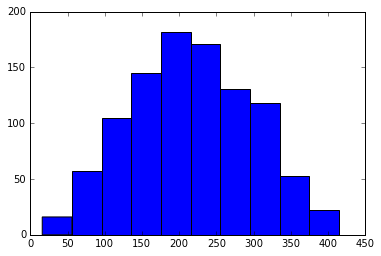

In [10]:
# Selecting the distribution on the basis of the
# amount of arrived people. Dont go higher than 5 people...
distNumber = 1
maxIterations = 10000

def generateRandomNumber(distNumber, maxIterations):
    # The actual generator function for this distribution
    for i in range(maxIterations):
        goalValue = random.random()
        n, t = PDFformula(goalValue)
        if n == distNumber:
            return t
        
    raise RuntimeError
    
# Just a test to see if the function is working properly!
# Try to see when the first person arrives (early) and for
# example the 4th person (later)
nums = []
for i in range(1000):
    randomNumber = generateRandomNumber(distNumber, maxIterations)
    nums.append(randomNumber)
plt.hist(nums)
plt.show()



### 0.3e

In [11]:
maxIterations = 100000

def getNumberOfVisitors(maxIterations):
    visitors, currentTime = 0, 0
    while True:
        # A visitor arrives each loop. If the next visitor doesnt
        # arrive before the last one, the current number of
        # visitors is returned
        randomTime = generateRandomNumber(visitors, maxIterations)
        if randomTime < currentTime:
            return visitors
        visitors += 1
        currentTime = randomTime

visitorsList = []
iterations = 1000
for i in range(iterations):
    if i%int(iterations/10.0) == 0:
        print("\tIteration ",i,end="")
    visitors = getNumberOfVisitors(maxIterations)
    visitorsList.append(visitors)

print("\n\nAverage number of visitors is ",np.mean(visitorsList))
plt.hist(visitorsList)
plt.show()
    

	Iteration  0	Iteration  100

RuntimeError: 